<div align='left'><font size="6" color="#FF0000"><strong>1.Regression</strong></font></div>
<hr>
<div align='left'><font size="3" color="#000000">  Here we use house-prices-advanced-regression-techniques dataset to perform regression. </font></div>
<hr>
> <img style="float: centre;" src="https://miro.medium.com/max/1024/1*Juv1bpp5--0Fl8cA4EmTPw.jpeg" width="450px"/>

In [1]:
from pycaret.regression import *
import pandas as pd

In [2]:
!wget "https://www.dropbox.com/s/11jj6m75j4xbi5b/test-houseprice.csv"
!wget "https://www.dropbox.com/s/whvz60d8kh0c0qk/train-houseprice.csv"

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
train_houseprice = pd.read_csv('train-houseprice.csv')
test_houseprice = pd.read_csv('test-houseprice.csv')
test_houseprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<div align='left'><font size="5" color="#FF0000">Setup the model</font></div>
<hr>

In [4]:
reg = setup(data=train_houseprice, target='SalePrice', numeric_imputation='mean', normalize=True,
             ignore_features=['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'Utilities'], pca=True,
             pca_method='linear', pca_components=30, verbose=False, session_id=3650)


<div align='left'><font size="5" color="#FF0000">Compare Model</font></div>
<hr>

In [5]:
compare_models(exclude = ['tr'] , turbo = True) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,18576.9165,877907188.6992,28897.0648,0.8588,0.1509,0.1110,0.1280
gbr,Gradient Boosting Regressor,18560.2269,870532428.3142,28762.5402,0.8588,0.1502,0.1104,0.1800
lightgbm,Light Gradient Boosting Machine,19155.6193,943229282.6381,29881.3696,0.8505,0.1536,0.1136,0.2200
rf,Random Forest Regressor,19619.0888,965478586.3318,30325.2776,0.8450,0.1567,0.1166,0.2330
xgboost,Extreme Gradient Boosting,19768.1567,1061549602.2188,31720.6624,0.8271,0.1580,0.1144,0.2530
huber,Huber Regressor,20042.7692,1126345207.9272,32545.8091,0.8250,0.1600,0.1160,0.0740
par,Passive Aggressive Regressor,20196.3175,1142275059.3428,32787.6128,0.8234,0.1615,0.1173,0.0740
lr,Linear Regression,20702.1499,1123010127.3112,32417.7903,0.8214,0.1857,0.1240,0.5170
en,Elastic Net,20355.2385,1143446045.8039,32706.3630,0.8210,0.1882,0.1197,0.0740
lasso,Lasso Regression,20843.7681,1131121387.9138,32569.6485,0.8205,0.1781,0.1252,0.4320


ExtraTreesRegressor(n_jobs=-1, random_state=3650)

<div align='left'><font size="5" color="#FF0000">Create Model</font></div>
<hr>

In [6]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15524.5356,510072088.8115,22584.7756,0.8954,0.1276,0.0922
1,15392.6859,432939385.8732,20807.1955,0.9218,0.1564,0.1102
2,16552.9822,491882812.0609,22178.4312,0.8899,0.1333,0.1039
3,18755.1809,1158581426.0015,34037.9410,0.8722,0.1432,0.1045
4,21772.2429,1451389588.3708,38097.1073,0.8349,0.1657,0.1257
5,16146.7657,575589280.2453,23991.4418,0.9017,0.1126,0.0844
6,18750.8737,986001834.0230,31400.6661,0.7957,0.1433,0.1070
7,21591.6790,1139197049.0506,33751.9933,0.8471,0.1491,0.1110
8,20029.8791,1013726445.6330,31839.0711,0.8424,0.1737,0.1263


<div align='left'><font size="5" color="#FF0000">Interpretation</font></div>
<hr>

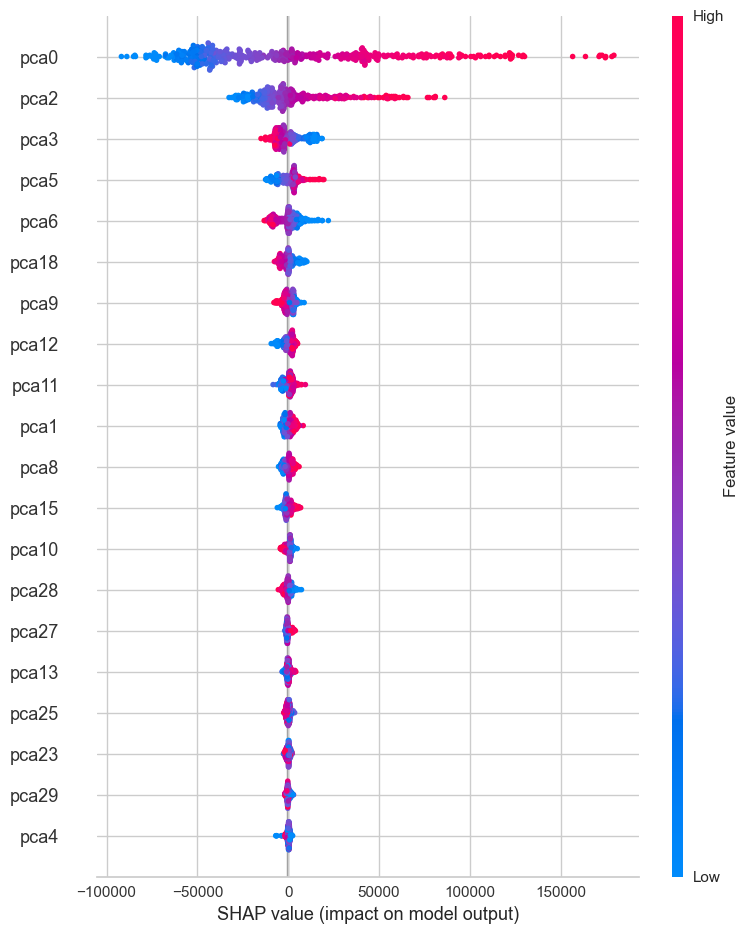

In [7]:
interpret_model(cb)

In [8]:
prediction = predict_model(cb, data = test_houseprice)

In [12]:
print(prediction.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
output_reg = pd.DataFrame({'Id': test_houseprice.Id, 'SalePrice': prediction['prediction_label']})
output_reg.to_csv('submission.csv', index=False)


In [14]:
output_reg.head()

,Id,SalePrice
0,1461,118380.544309
1,1462,152229.384143
2,1463,179061.091535
3,1464,192378.085544
4,1465,182260.456532
